In [495]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import nsepython as nse
import datetime 
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error



In [496]:
# Inputs
# Date input
from_date = datetime.date(year=2014,month=1,day=1).strftime("%Y-%m-%d")
to_date = (datetime.date(year=2025,month=8,day=6)).strftime("%Y-%m-%d")
print(datetime.datetime.now(),' : Date inputs taken!')



2025-08-07 14:58:32.038951  : Date inputs taken!


In [497]:
df = yf.download('^NSEI',start=from_date,end=to_date)
print(datetime.datetime.now(),' : Data downloaded!')
df.columns

/tmp/ipykernel_6686/2132949851.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('^NSEI',start=from_date,end=to_date)
[*********************100%***********************]  1 of 1 completed

2025-08-07 14:58:32.070459  : Data downloaded!


MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])

In [498]:
# Column renaming and feature selectio8n
df.columns = ['Open','High','Low','Close','Volume']
df.drop('Volume',axis=1,inplace=True)
print(datetime.datetime.now(),' : Columns renamed and fetures selecetd') 

2025-08-07 14:58:32.078967  : Columns renamed and fetures selecetd


In [499]:
# feature genration
for i in ['Open','High','Low','Close']:
    for j in ['Open','High','Low','Close']:
        df[f'{j}Wp{i}'] = round((df[j] - df[i].shift(1))/df[j]*100,2)

df['CloseWcOpen'] = round((df['Open'] - df['Close'])/df['Open']*100,2)



for i in ['Close','Open']:
    for j in ['High','Low']:
        df[f'Abs{i}Wc{j}'] = round(abs(df[i] - df[j])/df[i]*100,2)

cols = df.columns.tolist()

for i in [3,5,9,20,50,100]:
    for j in cols:
        df[f'rm{i}_{j}'] = df[j].rolling(i).mean()
        df[f'rstd{i}_{j}'] = df[j].rolling(i).std()
        


df.drop(['High','Open','Low','Close'],axis=1,inplace=True)
df.dropna(inplace=True)

        
df

/tmp/ipykernel_6686/3933967492.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'rm{i}_{j}'] = df[j].rolling(i).mean()
/tmp/ipykernel_6686/3933967492.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'rstd{i}_{j}'] = df[j].rolling(i).std()
/tmp/ipykernel_6686/3933967492.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

,OpenWpOpen,HighWpOpen,LowWpOpen,CloseWpOpen,OpenWpHigh,HighWpHigh,LowWpHigh,CloseWpHigh,OpenWpLow,HighWpLow,...,rm100_CloseWcOpen,rstd100_CloseWcOpen,rm100_AbsCloseWcHigh,rstd100_AbsCloseWcHigh,rm100_AbsCloseWcLow,rstd100_AbsCloseWcLow,rm100_AbsOpenWcHigh,rstd100_AbsOpenWcHigh,rm100_AbsOpenWcLow,rstd100_AbsOpenWcLow
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-03,0.72,0.84,-0.28,0.17,0.64,0.76,-0.36,0.09,2.38,2.50,...,0.0634,0.723392,0.5884,0.630561,0.5318,0.445481,0.5217,0.597976,0.5973,0.495315
2014-06-04,-0.18,0.23,-0.33,0.02,-0.31,0.11,-0.45,-0.10,0.81,1.23,...,0.0586,0.723599,0.5861,0.631527,0.5315,0.445594,0.5242,0.597013,0.5924,0.497308
2014-06-05,0.96,1.10,-0.57,-0.03,0.55,0.69,-0.99,-0.45,1.11,1.25,...,0.0732,0.727544,0.5970,0.631761,0.5287,0.444705,0.5202,0.598245,0.6042,0.505196
2014-06-06,1.44,1.56,0.31,0.63,1.30,1.42,0.17,0.49,2.94,3.06,...,0.0882,0.727322,0.6037,0.631918,0.5224,0.443136,0.5118,0.597904,0.6127,0.506834
2014-06-09,0.93,1.18,-0.04,0.50,0.81,1.06,-0.16,0.38,2.05,2.29,...,0.0931,0.727963,0.6082,0.630831,0.5249,0.442517,0.5115,0.598029,0.6201,0.506592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-30,0.14,0.33,-0.20,0.28,0.03,0.22,-0.30,0.17,1.03,1.22,...,0.0788,0.673680,0.5187,0.493859,0.4611,0.379925,0.4363,0.373949,0.5413,0.476752
2025-07-31,-0.35,0.41,-0.89,-0.86,-0.54,0.22,-1.09,-1.06,-0.01,0.74,...,0.0721,0.665905,0.5169,0.490711,0.4612,0.379809,0.4413,0.374909,0.5346,0.471943
2025-08-01,-0.83,0.06,-0.95,-0.14,-1.59,-0.70,-1.72,-0.90,-0.28,0.60,...,0.0622,0.669830,0.5153,0.491488,0.4590,0.377109,0.4497,0.375463,0.5225,0.466828


In [500]:
df['NxtCloseWpClose'] = df['CloseWpClose'].shift(-1)
df['NxtOpenWpClose'] = df['OpenWpClose'].shift(-1)
df['NxtOpenWpOpen'] = df['OpenWpOpen'].shift(-1)
df['NxtOpenWpHigh'] = df['OpenWpHigh'].shift(-1)
df['NxtOpenWpLow'] = df['OpenWpLow'].shift(-1)  

X_train, X_test, y_train, y_test = train_test_split(df.drop('NxtCloseWpClose',axis=1),
                                                    df['NxtCloseWpClose'],
                                                    test_size=0.2,
                                                    shuffle=False)
X_sample = X_test.iloc[-1]
X_test = X_test.iloc[:-1,:]
y_test = y_test.iloc[:-1]


/tmp/ipykernel_6686/1574288468.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NxtCloseWpClose'] = df['CloseWpClose'].shift(-1)
/tmp/ipykernel_6686/1574288468.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['NxtOpenWpClose'] = df['OpenWpClose'].shift(-1)
/tmp/ipykernel_6686/1574288468.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a d

In [501]:
model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
print(rmse)

0.4800997333381596


In [502]:
X_sample.iloc[-4:] = [0.03,-0.32,-0.37,0.21]

In [503]:
y_sample_pred = model.predict(X_sample.values.reshape(1,X_sample.shape[0]))
print('Sample prediction:',y_sample_pred)

Sample prediction: [0.10407677]


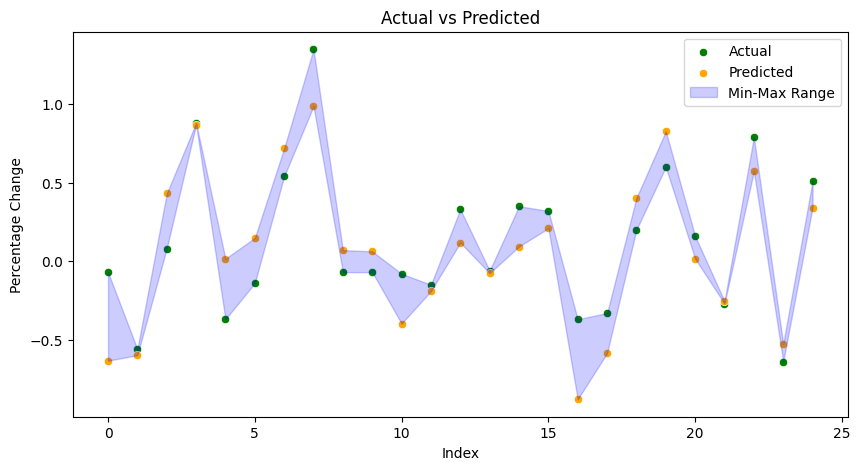

In [504]:
pred_table = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
pred_table.reset_index(inplace=True)
data = pred_table.reset_index()[:25]
plt.figure(figsize=(10,5))
sns.scatterplot(x=data.index,y=data['Actual'],color='green',label='Actual')
sns.scatterplot(x=data.index,y=data['Predicted'],color='orange',label='Predicted')
y_min = []
y_max = []
for i in range(len(data)):
    y_min.append(min(data['Actual'][i],data['Predicted'][i]))
    y_max.append(max(data['Actual'][i],data['Predicted'][i]))
plt.fill_between(data.index,y_min,y_max,alpha=0.2,color='blue',label='Min-Max Range')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Percentage Change')
plt.show()